---
title: "Deep Learning in Pytorch"
description: "Full training script of a deep learning model using pytorch"
date: 2025-08-19
categories: [machine-learning, tutorials, deep-learning, pytorch, svhn]
---

### Basic Intro

This blog depicts a basic CNN model used for image classification using SVHN dataset. The objective is to give an overview of how datasets are required to be loaded, how model architectures are to be made using pytorch library, and how overall training works. 

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt 

In [21]:
# Define transformations for the SVHN dataset
# Convert images to PyTorch Tensors
# Normalize the tensors. The values (0.5, 0.5, 0.5) are standard for normalizing to [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.SVHN(root='./data', split='train',
                                        download=True, transform=transform)

val_dataset = torchvision.datasets.SVHN(root='./data', split='test',
                                       download=True, transform=transform)

len(train_dataset), len(val_dataset)

(73257, 26032)

Random samples from SVHN training set:


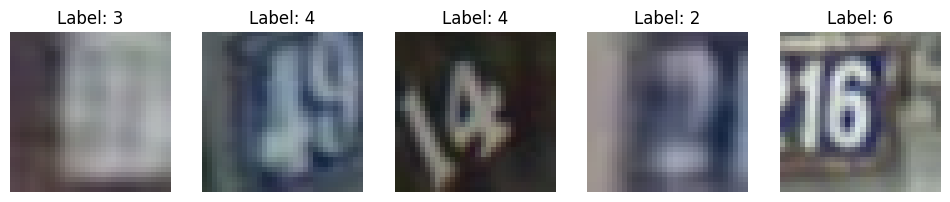

In [22]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # unnormalize [-1, 1] -> [0, 1]
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.axis("off")

print("Random samples from SVHN training set:")
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    idx = torch.randint(0, len(train_dataset), (1,)).item()
    img, label = train_dataset[idx]
    plt.subplot(1, 5, i+1)
    imshow(img)
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.show()

In [23]:
BATCH_SIZE = 64
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Data loaded. Training samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}\n")

Data loaded. Training samples: 73257, Validation samples: 26032



A batch from the DataLoader:


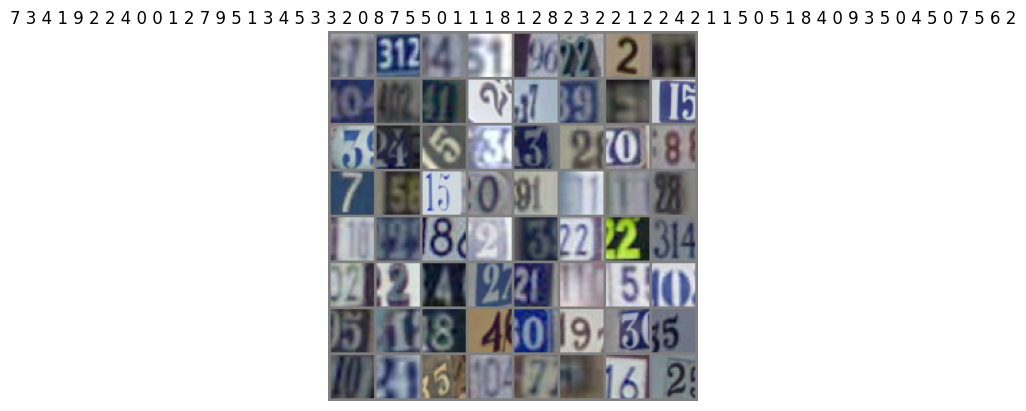

In [24]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the batch
print("A batch from the DataLoader:")
imshow(torchvision.utils.make_grid(images, nrow=8),
       title=" ".join(str(label.item()) for label in labels))
plt.show()

### Model must learn to focus on the central digit and ignore the extra context

In [25]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

print("Step 2: Model Definition")

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # SVHN images are 3x32x32 (3 color channels)
        self.features = nn.Sequential(
            # Input: 3x32x32
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1), # Output: 16x32x32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # Output: 16x16x16
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1), # Output: 32x16x16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # Output: 32x8x8
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 8 * 8, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleCNN(num_classes=10)
print("Model architecture:")
print(model)
print("\n")


Step 2: Model Definition
Model architecture:
SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)




In [26]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

NUM_EPOCHS = 20
for epoch in range(NUM_EPOCHS):
    model.train() 
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {running_loss/len(train_loader):.4f}")

print("Training finished.\n")

Epoch [1/20], Loss: 0.9173
Epoch [2/20], Loss: 0.4778
Epoch [3/20], Loss: 0.4011
Epoch [4/20], Loss: 0.3499
Epoch [5/20], Loss: 0.3119
Epoch [6/20], Loss: 0.2827
Epoch [7/20], Loss: 0.2563
Epoch [8/20], Loss: 0.2327
Epoch [9/20], Loss: 0.2116
Epoch [10/20], Loss: 0.1927
Epoch [11/20], Loss: 0.1746
Epoch [12/20], Loss: 0.1595
Epoch [13/20], Loss: 0.1442
Epoch [14/20], Loss: 0.1314
Epoch [15/20], Loss: 0.1208
Epoch [16/20], Loss: 0.1081
Epoch [17/20], Loss: 0.1003
Epoch [18/20], Loss: 0.0915
Epoch [19/20], Loss: 0.0826
Epoch [20/20], Loss: 0.0747
Training finished.



In [27]:
model.eval() 
all_preds = []
all_labels = []

# `torch.no_grad()` disables gradient calculation for efficiency
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted', zero_division=0)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}\n")

Validation Accuracy: 0.8778
Validation Precision: 0.8787
Validation Recall: 0.8778
Validation F1 Score: 0.8778



In [29]:
# model.state_dict()

In [30]:
print("Step 5: Saving and Loading the Model")

MODEL_PATH = "svhn_cnn_weights.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

Step 5: Saving and Loading the Model
Model saved to svhn_cnn_weights.pth


In [32]:
new_model = SimpleCNN(num_classes=10)
new_model.load_state_dict(torch.load(MODEL_PATH))
print("Model weights loaded into a new instance.\n")

Model weights loaded into a new instance.



In [33]:
print("Step 6: Inference on New Data")

new_data_point, true_label_idx = val_dataset[0]
new_data_point = new_data_point.unsqueeze(0)

new_model.eval()

with torch.no_grad():
    prediction_logits = new_model(new_data_point)
    # Get the class with the highest score
    predicted_class_idx = torch.argmax(prediction_logits, dim=1).item()

print(f"True Label: {classes[true_label_idx]}")
print(f"Predicted Class: {classes[predicted_class_idx]}")

Step 6: Inference on New Data
True Label: 5
Predicted Class: 5
